In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline  

import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('..')
from env_config import DATA_PATH
from evaluation import *

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

sns.set(style='ticks')
sns.set_palette('cubehelix')

# Z_B vs Z_spec

In [4]:
def redshift_metrics_z_b(predictions):
    classes = np.unique(predictions['CLASS'])
    reports = [('CLASS', 'Z_B', 'spec. subsets'), ('CLASS_PHOTO', 'Z_B', 'photo subsets')]
    for class_col, z_photo_col, name in reports:
        print(name)
        # Standard metrics
        metrics = [('MSE', mean_squared_error), ('R2', r2_score),
                   ('rel. error', relative_err_mean), ('rel. error std', relative_err_std)]
        for metric_name, metric_func in metrics:
            score = np.around(metric_func(predictions['Z'], predictions[z_photo_col]), 4)
            print('{metric_name}: {score}'.format(metric_name=metric_name, score=score))

            # Divided for classes
            if class_col not in predictions:
                continue
            scores = np.around(metric_class_split(predictions['Z'], predictions[z_photo_col], metric=metric_func,
                                                  classes=predictions[class_col]), 4)
            print(', '.join(['{class_name}: {score}'.format(class_name=class_name, score=score) for class_name, score in
                             zip(classes, scores)]))

In [5]:
def z_b_vs_z_spec(predictions, test_subset=None):
    if test_subset:
        mask = predictions['test_subset'] == test_subset
        predictions = predictions.loc[mask]
    redshift_metrics_z_b(predictions)

In [6]:
predictions = pd.read_csv('../outputs/exp_preds/KiDS_DR4_x_SDSS_DR14_xgb_f-all_test-magnitude__2019-11-20_14:59:18.csv')
predictions = add_kids_columns(predictions)

In [7]:
z_b_vs_z_spec(predictions, test_subset='top')

spec. subsets
MSE: 1.2187
GALAXY: 0.0257, QSO: 3.5926, STAR: 4.3364
R2: -1.1425
GALAXY: -1.0641, QSO: -7.0063, STAR: -26144012.5075
rel. error: 0.0569
GALAXY: 0.0562, QSO: -0.4465, STAR: 0.9151
rel. error std: 0.7511
GALAXY: 0.0958, QSO: 0.3249, STAR: 1.8712
photo subsets
MSE: 1.2187
GALAXY: 0.0423, QSO: 3.6161, STAR: 4.2474
R2: -1.1425
GALAXY: -0.4112, QSO: -7.0238, STAR: -20.4956
rel. error: 0.0569
GALAXY: 0.0548, QSO: -0.4333, STAR: 0.815
rel. error std: 0.7511
GALAXY: 0.0953, QSO: 0.3645, STAR: 1.8526


In [8]:
z_b_vs_z_spec(predictions, test_subset='random')

spec. subsets
MSE: 0.3976
GALAXY: 0.0429, QSO: 2.9685, STAR: 0.3086
R2: -0.1075
GALAXY: 0.3067, QSO: -2.4205, STAR: -2078452.6048
rel. error: 0.0865
GALAXY: 0.1361, QSO: -0.3384, STAR: 0.1311
rel. error std: 0.3442
GALAXY: 0.1474, QSO: 0.4657, STAR: 0.5399
photo subsets
MSE: 0.3976
GALAXY: 0.047, QSO: 3.0484, STAR: 0.3218
R2: -0.1075
GALAXY: 0.2974, QSO: -2.659, STAR: -11.729
rel. error: 0.0865
GALAXY: 0.1358, QSO: -0.3471, STAR: 0.1251
rel. error std: 0.3442
GALAXY: 0.1477, QSO: 0.4732, STAR: 0.5379


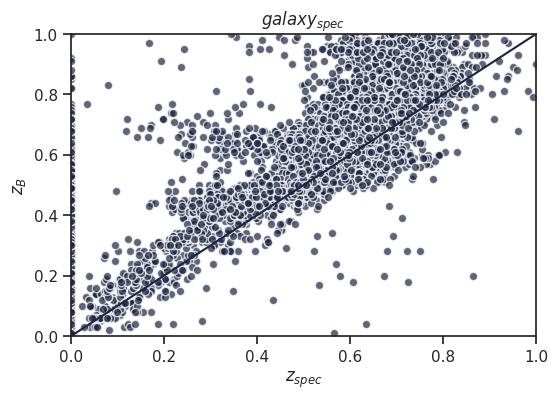

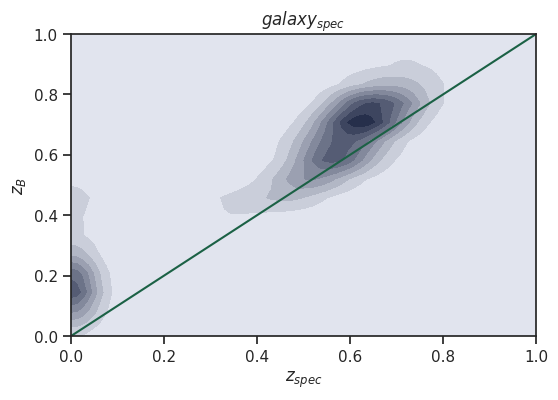

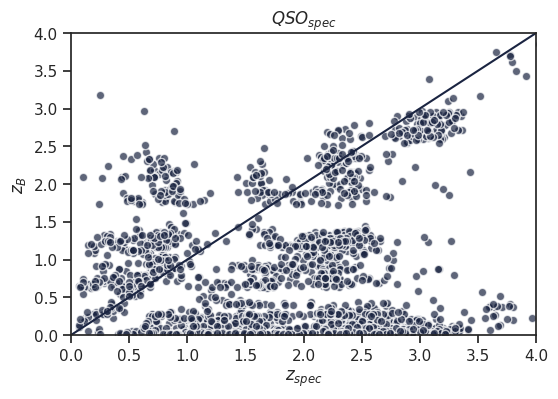

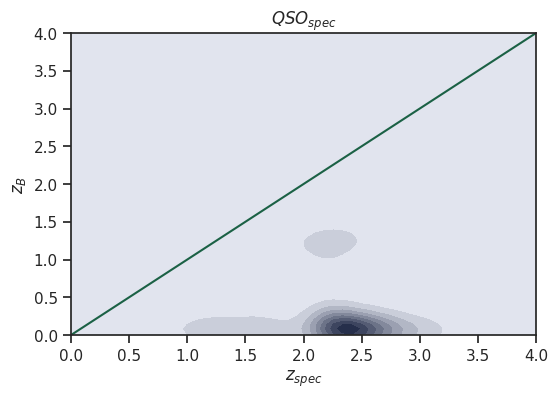

In [9]:
plot_z_true_vs_pred(predictions, 'Z_B', z_max=4)

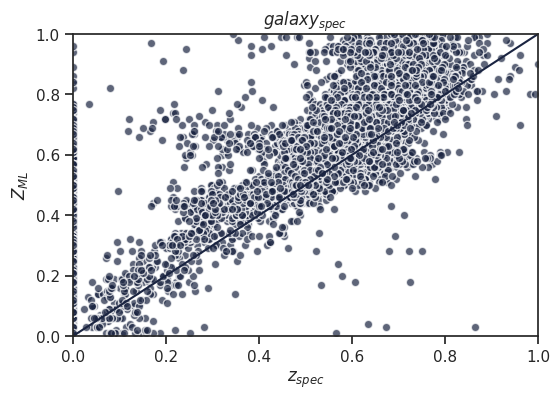

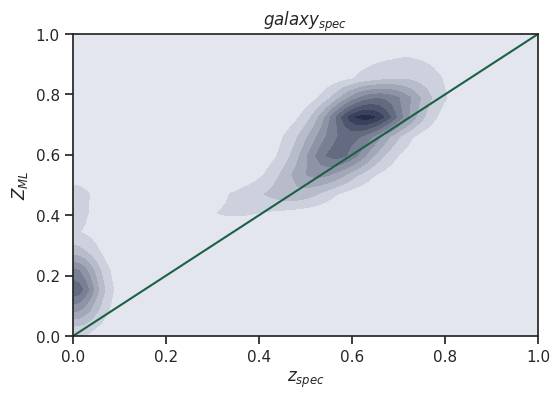

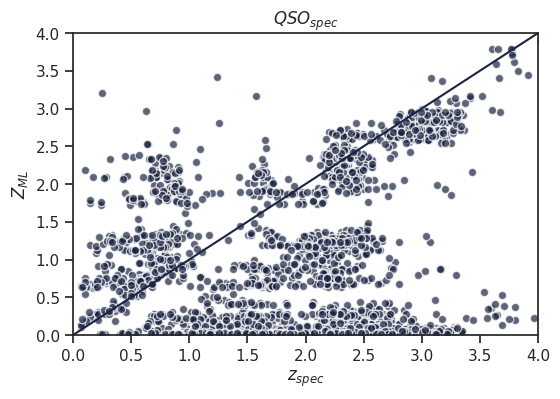

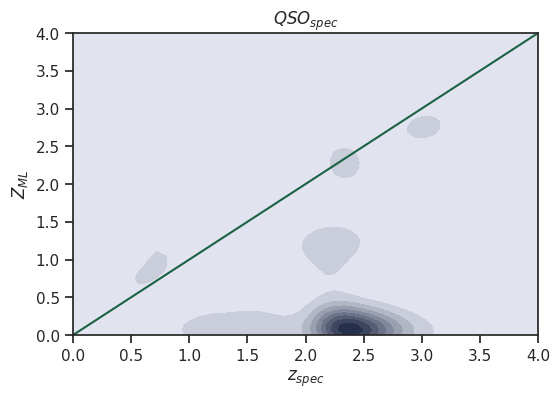

In [10]:
plot_z_true_vs_pred(predictions, 'Z_ML', z_max=4)